# CNN识别猫狗

In [1]:
#数据加载
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('./data/training_set',target_size=(50,50),batch_size=32,class_mode='binary')

Using TensorFlow backend.


Found 8000 images belonging to 2 classes.


In [2]:
#查看数据类型
print(type(training_set))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [3]:
#每个批次的样本数量
print(training_set.batch_size)

32


In [4]:
#加载的图片名称
print(training_set.filenames)

['cats\\cats_1.jpg', 'cats\\cats_10.jpg', 'cats\\cats_100.jpg', 'cats\\cats_1000.jpg', 'cats\\cats_1001.jpg', 'cats\\cats_1002.jpg', 'cats\\cats_1003.jpg', 'cats\\cats_1004.jpg', 'cats\\cats_1005.jpg', 'cats\\cats_1006.jpg', 'cats\\cats_1007.jpg', 'cats\\cats_1008.jpg', 'cats\\cats_1009.jpg', 'cats\\cats_101.jpg', 'cats\\cats_1010.jpg', 'cats\\cats_1011.jpg', 'cats\\cats_1012.jpg', 'cats\\cats_1013.jpg', 'cats\\cats_1014.jpg', 'cats\\cats_1015.jpg', 'cats\\cats_1016.jpg', 'cats\\cats_1017.jpg', 'cats\\cats_1018.jpg', 'cats\\cats_1019.jpg', 'cats\\cats_102.jpg', 'cats\\cats_1020.jpg', 'cats\\cats_1021.jpg', 'cats\\cats_1022.jpg', 'cats\\cats_1023.jpg', 'cats\\cats_1024.jpg', 'cats\\cats_1025.jpg', 'cats\\cats_1026.jpg', 'cats\\cats_1027.jpg', 'cats\\cats_1028.jpg', 'cats\\cats_1029.jpg', 'cats\\cats_103.jpg', 'cats\\cats_1030.jpg', 'cats\\cats_1031.jpg', 'cats\\cats_1032.jpg', 'cats\\cats_1033.jpg', 'cats\\cats_1034.jpg', 'cats\\cats_1035.jpg', 'cats\\cats_1036.jpg', 'cats\\cats_1037.jp

In [5]:
#确认标签
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [6]:
#training-set[][][] 第一个为第几个批次；第二个为确定输入X还是y；第三个用于确定第几个样本
print(training_set[0][1])

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1.]


In [7]:
#第一个批次第一个样本的输入数据
print(training_set[0][0][0,:,:,:])

[[[0.26666668 0.2392157  0.1764706 ]
  [0.25490198 0.24705884 0.20000002]
  [0.28235295 0.25490198 0.21568629]
  ...
  [0.18431373 0.16862746 0.1254902 ]
  [0.16862746 0.15294118 0.10588236]
  [0.05882353 0.04705883 0.01960784]]

 [[0.25490198 0.24705884 0.20000002]
  [0.32156864 0.29411766 0.23137257]
  [0.34509805 0.3137255  0.2392157 ]
  ...
  [0.2901961  0.28627452 0.26666668]
  [0.13725491 0.12156864 0.07450981]
  [0.09411766 0.07450981 0.0509804 ]]

 [[0.30980393 0.27450982 0.20784315]
  [0.32156864 0.28627452 0.21960786]
  [0.34901962 0.31764707 0.24313727]
  ...
  [0.17254902 0.17254902 0.14117648]
  [0.16470589 0.14901961 0.10196079]
  [0.09411766 0.07843138 0.03529412]]

 ...

 [[0.28627452 0.23529413 0.16862746]
  [0.28627452 0.23529413 0.16862746]
  [0.30980393 0.25882354 0.19215688]
  ...
  [0.21960786 0.20000002 0.1254902 ]
  [0.21960786 0.20000002 0.12156864]
  [0.23137257 0.20392159 0.12941177]]

 [[0.27450982 0.22352943 0.15686275]
  [0.2901961  0.2392157  0.17254902]


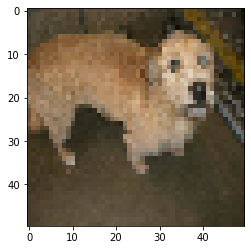

In [8]:
#可视化第一个批次第一张图片
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.imshow(training_set[0][0][0,:,:,:])

In [9]:
#加载后按批次存放的每个样本对应的索引号
print(training_set.index_array)

[7657 1612 3260 ... 7612 2199 1875]


In [10]:
#获取文件名称
print(training_set.filenames[2384])

cats\cats_3144.jpg


![cnn_structure](structure.jpg)

In [11]:
#建立CNN模型
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

cnn_model = Sequential()
#添加卷积层
cnn_model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
#添加池化层
cnn_model.add(MaxPool2D(pool_size=(2,2)))
#添加卷积层
cnn_model.add(Conv2D(32,(3,3),activation='relu'))
#添加池化层
cnn_model.add(MaxPool2D(pool_size=(2,2)))
#flatten展开
cnn_model.add(Flatten())
#FC层
cnn_model.add(Dense(units=128,activation='relu'))
#预测输出层
cnn_model.add(Dense(units=1,activation='sigmoid'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [12]:
#模型配置
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#模型训练
cnn_model.fit_generator(training_set,epochs=20)

Epoch 1/20
250/250 [==============================] - 32s 129ms/step - loss: 0.6700 - accuracy: 0.5775
Epoch 2/20
250/250 [==============================] - 30s 121ms/step - loss: 0.5778 - accuracy: 0.7000
Epoch 3/20
250/250 [==============================] - 32s 129ms/step - loss: 0.5190 - accuracy: 0.7442
Epoch 4/20
250/250 [==============================] - 36s 146ms/step - loss: 0.4802 - accuracy: 0.7664
Epoch 5/20
250/250 [==============================] - 37s 148ms/step - loss: 0.4434 - accuracy: 0.7904
Epoch 6/20
250/250 [==============================] - 34s 137ms/step - loss: 0.4131 - accuracy: 0.8044
Epoch 7/20
250/250 [==============================] - 36s 143ms/step - loss: 0.3740 - accuracy: 0.8320
Epoch 8/20
250/250 [==============================] - 39s 155ms/step - loss: 0.3422 - accuracy: 0.8496
Epoch 9/20
250/250 [==============================] - 43s 172ms/step - loss: 0.2943 - accuracy: 0.8749
Epoch 10/20
250/250 [==============================] - 35s 140ms/step - l

In [14]:
#训练集数据预测准确率
accuracy_train = cnn_model.evaluate_generator(training_set)
print(accuracy_train)

[0.048568304628133774, 0.9927499890327454]


In [ ]:
#模型存储
cnn_model.save('task1_model_1.h5')

In [15]:
#模型加载
from keras.models import load_model
model_new = load_model('task1_model_1.h5')

In [16]:
#测试数据集预测准确率
test_set = train_datagen.flow_from_directory('./task1_data/test_set',target_size=(50,50),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
accuracy_test = cnn_model.evaluate_generator(test_set)
print(accuracy_test)

[2.0366737842559814, 0.7540000081062317]


In [18]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [19]:
#单张图片的预测v (pip install pillow)
from keras.preprocessing.image import load_img, img_to_array
pic_1 = '1.png'
pic_1 = load_img(pic_1,target_size=(50,50))
pic_1 = img_to_array(pic_1)
pic_1 = pic_1/255
pic_1 = pic_1.reshape(1,50,50,3)

#预测
result = cnn_model.predict_classes(pic_1)
print('dog' if result==1 else 'cat')

dog


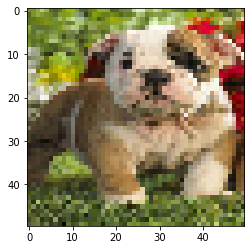

In [20]:
fig2 = plt.figure()
plt.imshow(pic_1[0])

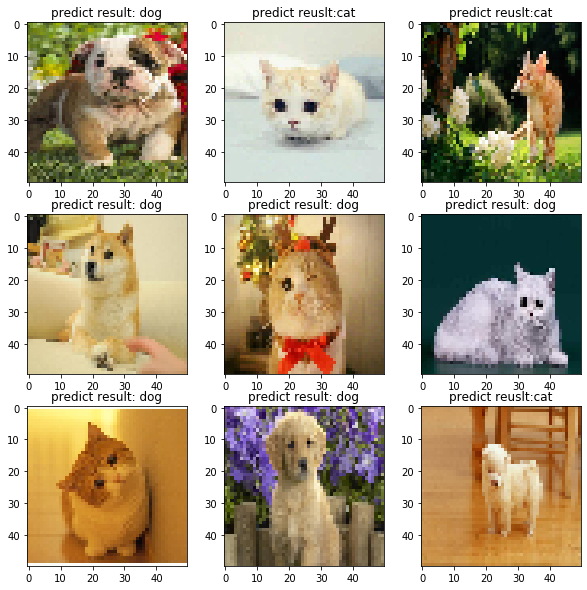

In [21]:
#本地九张图片处理
a = [i for i in range(1,10)]
fig3 = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.png'
    pic_1 = load_img(img_name,target_size=(50,50))
    pic_1 = img_to_array(pic_1)
    pic_1 = pic_1/255
    pic_1 = pic_1.reshape(1,50,50,3)
    result = cnn_model.predict_classes(pic_1)
#     print('dog' if result==1 else 'cat')
    
    plt.subplot(3,3,i)
    plt.imshow(pic_1[0])
    plt.title('predict result: dog' if result==1 else 'predict reuslt:cat')